In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outpath = "output/input_plotterfile/"

In [2]:
df = pd.read_csv("/scratch/groups/horence/JuliaO/nf-readzs/work/ee/e7f4deecb571ad6a6fc3766186f177/V1_Mouse_Brain_Sagittal_Posterior_all_pvals.txt",sep="\t")

In [3]:
df.columns

Index(['window', 'ontology', 'sum_counts_per_window_per_ont',
       'med_counts_per_window_per_ont', 'median_z_scaled', 'pval',
       'significant', 'medians_range', 'max_med', 'min_med', 'gene'],
      dtype='object')

In [39]:
dataname = "me"
score = "ReadZS"
samples = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/make_samplesheet/spatial.csv",index_col = 0)
row = samples.loc[dataname]

scores = pd.read_csv("/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/make_samplesheet/scores.csv",index_col=0)
srow = scores.loc[score]

In [40]:
row[srow["valname"]]

'/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/V1_Mouse_Brain_Sagittal_Anterior/zscore/V1_Mouse_Brain_Sagittal_Anterior.zscore'

In [41]:
zdf = pd.read_csv(row[srow["valname"]],sep="\t")

In [42]:
# randomize so rank ties are broken evenly
zdf = zdf.sample(frac=1)

In [43]:
zdf["rank"] = zdf.groupby("window")["z_scaled"].rank("first", ascending=False)

In [44]:
qs = [0.25,0.5,0.75]
for q in qs:
  print(q)
  zdf["{}_quant".format(q)] = zdf["window"].map(zdf.groupby("window")["rank"].quantile(q))

0.25
0.5
0.75


In [45]:
zdf["quant"] = 1
for i in range(len(qs)):
  zdf.loc[zdf["rank"] > zdf["{}_quant".format(qs[i])],"quant"] = i + 2

In [46]:
zdf["window_quant"] = zdf["window"] + "_" + zdf["quant"].astype(str)
print("window_quant")
zdf["sum_counts_per_window_per_ont"] = zdf["window_quant"].map(zdf.groupby("window_quant")["count"].sum())
print("sum_counts_per_window_per_ont")
zdf["med_counts_per_window_per_ont"] = zdf["window_quant"].map(zdf.groupby("window_quant")["count"].median())
print("med_counts_per_window_per_ont")
zdf["median_z_scaled"] = zdf["window_quant"].map(zdf.groupby("window_quant")["z_scaled"].median())
print("median_z_scaled")


window_quant
sum_counts_per_window_per_ont
med_counts_per_window_per_ont
median_z_scaled


In [47]:
zdf["window_cell_id"] = zdf["window"] + "_" + zdf["cell_id"]
zdf[["window_cell_id","window","cell_id","quant"]]

,window_cell_id,window,cell_id,quant
4744059,chr15_19627_plus_V1_Mouse_Brain_Sagittal_Anter...,chr15_19627_plus,V1_Mouse_Brain_Sagittal_Anterior_CTTTACCGAATAGTAG,4
15450047,chr7_5507_minus_V1_Mouse_Brain_Sagittal_Anteri...,chr7_5507_minus,V1_Mouse_Brain_Sagittal_Anterior_TGCAAAGTTCGTCTGT,4
8115314,chr1_30273_plus_V1_Mouse_Brain_Sagittal_Anteri...,chr1_30273_plus,V1_Mouse_Brain_Sagittal_Anterior_CGTTATCATACTTCCA,3
8262707,chr1_4770_minus_V1_Mouse_Brain_Sagittal_Anteri...,chr1_4770_minus,V1_Mouse_Brain_Sagittal_Anterior_GCAGTGTGGCTATAGG,2
8038623,chr1_36219_minus_V1_Mouse_Brain_Sagittal_Anter...,chr1_36219_minus,V1_Mouse_Brain_Sagittal_Anterior_CCGTAGGGTTGTTTAC,1
...,...,...,...,...
13096307,chr5_20365_plus_V1_Mouse_Brain_Sagittal_Anteri...,chr5_20365_plus,V1_Mouse_Brain_Sagittal_Anterior_TAGGCTAAAGTGGCAC,2
12826294,chr5_19215_minus_V1_Mouse_Brain_Sagittal_Anter...,chr5_19215_minus,V1_Mouse_Brain_Sagittal_Anterior_GATTAACCGAAAGCCC,1
18091996,chrX_31874_plus_V1_Mouse_Brain_Sagittal_Anteri...,chrX_31874_plus,V1_Mouse_Brain_Sagittal_Anterior_TCCCAAACAGACAACG,1
15592855,chr7_23944_minus_V1_Mouse_Brain_Sagittal_Anter...,chr7_23944_minus,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCCATACAACT,4


In [48]:
zdf["quant"].value_counts()

1    4602583
4    4577787
2    4527598
3    4493866
Name: quant, dtype: int64

In [49]:
window = "chr17_5159_minus"
chrom = window.split("_")[0]
zscore = pd.read_csv("/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/V1_Mouse_Brain_Sagittal_Anterior/zscore/V1_Mouse_Brain_Sagittal_Anterior_{}.zscore".format(chrom),sep="\t")
zscore["window_cell_id"] = zscore["window"] + "_" + zscore["cell_id"]
zscore["quant"] = zscore["window_cell_id"].map({x : y for x, y in zip(zdf["window_cell_id"],zdf["quant"])})
zscore.to_csv("{}zscore/{}_{}.zscore".format(outpath,dataname,chrom),sep="\t")

In [66]:
ann = pd.read_csv("/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/V1_Mouse_Brain_Sagittal_Anterior/annotated_files/annotated_windows.file",sep="\t")
ann.head()

,chr,start,end,window,strand,gene
0,chr1,0,5000,chr1_1_minus,-,.
1,chr1,0,5000,chr1_1_plus,+,.
2,chr1,5000,10000,chr1_2_minus,-,.
3,chr1,5000,10000,chr1_2_plus,+,.
4,chr1,10000,15000,chr1_3_minus,-,.


In [67]:
ann["gene"].value_counts()

.                                                                      805152
Mir684-1                                                                 5185
Snora19,Mir3084-1,Mir3084-2                                              5035
Btbd35f11,Btbd35f10,Btbd35f3,Btbd35f4,Btbd35f26,Btbd35f15,Btbd35f20      3706
LOC100861691,Gm20736,Gm21258,Sly                                         2624
                                                                        ...  
Cptp                                                                        1
Ube2j2                                                                      1
Tnfrsf4,Sdf4                                                                1
Tnfrsf4                                                                     1
Olfr1256                                                                    1
Name: gene, Length: 26948, dtype: int64

In [60]:
zdf = zdf.drop_duplicates("window_quant")
print("dropped duplicates")
zdf["pval"] = 0
zdf["significant"] = True
zdf["max_med"] = zdf["window_quant"].map(zdf.groupby("window_quant")["median_z_scaled"].max())
zdf["min_med"] = zdf["window_quant"].map(zdf.groupby("window_quant")["median_z_scaled"].min())
zdf["medians_range"] = zdf["max_med"] - zdf["min_med"]
# figure out how they're getting the gene name and do the same thing
zdf["gene"] = ann[ann["window"] == window].iloc[0]["gene"]
zdf["ontology"] = zdf["quant"]

dropped duplicates


In [68]:
zdf["gene"] = zdf["window"].map({k : v for k, v in zip(ann["window"],ann["gene"])})

In [69]:
zdf

,cell_id,chrom,read_strand,window,channel,z_scaled,count,barcode,in_tissue,array_row,...,med_counts_per_window_per_ont,median_z_scaled,window_cell_id,pval,significant,max_med,min_med,medians_range,gene,ontology
4744059,V1_Mouse_Brain_Sagittal_Anterior_CTTTACCGAATAGTAG,chr15,+,chr15_19627_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.902481,2,CTTTACCGAATAGTAG-1,1.0,50.0,...,3.0,-0.670632,chr15_19627_plus_V1_Mouse_Brain_Sagittal_Anter...,0,True,-0.670632,-0.670632,0.0,Pfkm,4
15450047,V1_Mouse_Brain_Sagittal_Anterior_TGCAAAGTTCGTCTGT,chr7,-,chr7_5507_minus,V1_Mouse_Brain_Sagittal_Anterior,-0.197906,1,NaN,NaN,NaN,...,5.0,-0.417402,chr7_5507_minus_V1_Mouse_Brain_Sagittal_Anteri...,0,True,-0.417402,-0.417402,0.0,Pld3,4
8115314,V1_Mouse_Brain_Sagittal_Anterior_CGTTATCATACTTCCA,chr1,+,chr1_30273_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.209330,1,CGTTATCATACTTCCA-1,1.0,45.0,...,3.0,-0.193042,chr1_30273_plus_V1_Mouse_Brain_Sagittal_Anteri...,0,True,-0.193042,-0.193042,0.0,Ivns1abp,3
8262707,V1_Mouse_Brain_Sagittal_Anterior_GCAGTGTGGCTATAGG,chr1,-,chr1_4770_minus,V1_Mouse_Brain_Sagittal_Anterior,0.100930,2,GCAGTGTGGCTATAGG-1,1.0,59.0,...,2.0,0.110641,chr1_4770_minus_V1_Mouse_Brain_Sagittal_Anteri...,0,True,0.110641,0.110641,0.0,Smap1,2
8038623,V1_Mouse_Brain_Sagittal_Anterior_CCGTAGGGTTGTTTAC,chr1,-,chr1_36219_minus,V1_Mouse_Brain_Sagittal_Anterior,0.846877,2,CCGTAGGGTTGTTTAC-1,1.0,60.0,...,1.0,1.078702,chr1_36219_minus_V1_Mouse_Brain_Sagittal_Anter...,0,True,1.078702,1.078702,0.0,Nvl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11191891,V1_Mouse_Brain_Sagittal_Anterior_ACTCGTCAGTAATCCC,chr4,-,chr4_11402_minus,V1_Mouse_Brain_Sagittal_Anterior,1.341641,1,ACTCGTCAGTAATCCC-1,1.0,36.0,...,1.0,1.341641,chr4_11402_minus_V1_Mouse_Brain_Sagittal_Anter...,0,True,1.341641,1.341641,0.0,Epb41l4b,1
925426,V1_Mouse_Brain_Sagittal_Anterior_AAGACCAAATAACTCA,chr11,+,chr11_16797_plus,V1_Mouse_Brain_Sagittal_Anterior,1.414214,1,AAGACCAAATAACTCA-1,1.0,62.0,...,1.0,1.414214,chr11_16797_plus_V1_Mouse_Brain_Sagittal_Anter...,0,True,1.414214,1.414214,0.0,Synrg,1
12164250,V1_Mouse_Brain_Sagittal_Anterior_TTGTGATCTGTTCAGT,chr4,+,chr4_9004_plus,V1_Mouse_Brain_Sagittal_Anterior,0.447214,1,TTGTGATCTGTTCAGT-1,1.0,69.0,...,1.0,0.447214,chr4_9004_plus_V1_Mouse_Brain_Sagittal_Anterio...,0,True,0.447214,0.447214,0.0,Polr1e,2
12761005,V1_Mouse_Brain_Sagittal_Anterior_GAACCTTTAACGATCC,chr5,-,chr5_14992_minus,V1_Mouse_Brain_Sagittal_Anterior,-1.000000,1,GAACCTTTAACGATCC-1,1.0,63.0,...,1.0,-1.000000,chr5_14992_minus_V1_Mouse_Brain_Sagittal_Anter...,0,True,-1.000000,-1.000000,0.0,.,4


In [61]:
cols = ['window', 'ontology', 'sum_counts_per_window_per_ont',
       'med_counts_per_window_per_ont', 'median_z_scaled', 'pval',
       'significant', 'medians_range', 'max_med', 'min_med', 'gene']
sub = zdf[zdf["window"] == window][cols]
sub.sort_values("sum_counts_per_window_per_ont").to_csv("{}{}.tsv".format(outpath,window),sep="\t")
sub

,window,ontology,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,pval,significant,medians_range,max_med,min_med,gene
6215569,chr17_5159_minus,1,2176,2.0,1.036318,0,True,0.0,1.036318,1.036318,"Antkmt,Metrn"
6400832,chr17_5159_minus,2,3225,4.0,0.201474,0,True,0.0,0.201474,0.201474,"Antkmt,Metrn"
6318703,chr17_5159_minus,3,3474,4.0,-0.343577,0,True,0.0,-0.343577,-0.343577,"Antkmt,Metrn"
6355221,chr17_5159_minus,4,1802,2.0,-0.746010,0,True,0.0,-0.746010,-0.746010,"Antkmt,Metrn"


In [62]:
"{}{}.tsv".format(outpath,window)

'output/input_plotterfile/chr17_5159_minus.tsv'

In [ ]:

counts = pd.read_csv("/oak/stanford/groups/horence/JuliaO/nf-readzs/visium/V1_Mouse_Brain_Sagittal_Anterior/counts/V1_Mouse_Brain_Sagittal_Anterior_{}.txt".format(chrom),sep="\t",header=None)

In [ ]:
counts[7] = counts[6] + "_" + counts[0]

In [ ]:
counts[4] = counts[7].map({x : y for x, y in zip(zdf["window_cell_id"],zdf["quant"])})

In [ ]:
counts.dropna()[range(7)].to_csv("{}counts/{}_{}.txt".format(outpath,dataname,chrom),sep="\t",header=False,index=False)

In [36]:
zdf.head()

,cell_id,chrom,read_strand,window,channel,z_scaled,count,barcode,in_tissue,array_row,...,med_counts_per_window_per_ont,median_z_scaled,window_cell_id,pval,significant,max_med,min_med,medians_range,gene,ontology
16653181,V1_Mouse_Brain_Sagittal_Anterior_ACGCGAAGTCAGACGA,chr9,+,chr9_9257_plus,V1_Mouse_Brain_Sagittal_Anterior,0.208864,1,ACGCGAAGTCAGACGA-1,1.0,49.0,...,1.0,-0.000520,chr9_9257_plus_V1_Mouse_Brain_Sagittal_Anterio...,0,True,-0.000520,-0.000520,0.0,,2
7992447,V1_Mouse_Brain_Sagittal_Anterior_CATGTCTCATTTATGG,chr1,-,chr1_7759_minus,V1_Mouse_Brain_Sagittal_Anterior,-1.989132,1,CATGTCTCATTTATGG-1,1.0,49.0,...,2.0,-0.871238,chr1_7759_minus_V1_Mouse_Brain_Sagittal_Anteri...,0,True,-0.871238,-0.871238,0.0,,4
590544,V1_Mouse_Brain_Sagittal_Anterior_GGTGTAGGTAAGTAAA,chr10,+,chr10_15717_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.509479,1,NaN,NaN,NaN,...,1.0,-0.291233,chr10_15717_plus_V1_Mouse_Brain_Sagittal_Anter...,0,True,-0.291233,-0.291233,0.0,,3
8792717,V1_Mouse_Brain_Sagittal_Anterior_AATTACGAGACCCATC,chr2,+,chr2_27214_plus,V1_Mouse_Brain_Sagittal_Anterior,0.164769,1,AATTACGAGACCCATC-1,1.0,59.0,...,3.0,0.186501,chr2_27214_plus_V1_Mouse_Brain_Sagittal_Anteri...,0,True,0.186501,0.186501,0.0,,2
490548,V1_Mouse_Brain_Sagittal_Anterior_GCAACAGCAGTATGCG,chr10,-,chr10_16081_minus,V1_Mouse_Brain_Sagittal_Anterior,-0.572395,1,GCAACAGCAGTATGCG-1,1.0,46.0,...,2.0,-0.712890,chr10_16081_minus_V1_Mouse_Brain_Sagittal_Ante...,0,True,-0.712890,-0.712890,0.0,,4


In [38]:
"{}{}.tsv".format(outpath,window)

'output/input_plotterfile/chr17_5159_minus.tsv'

In [21]:
df

,0,1,2,3,4,5,6
0,V1_Mouse_Brain_Sagittal_Anterior_GAATAGCCCTGCGGTC,chr19,3206611,-,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_642_minus
1,V1_Mouse_Brain_Sagittal_Anterior_AGATACCGGTGTTCAC,chr19,3249998,-,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_650_minus
2,V1_Mouse_Brain_Sagittal_Anterior_GCCCGACTTCTTCCCG,chr19,3251685,-,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_651_minus
3,V1_Mouse_Brain_Sagittal_Anterior_GGCGCTTCATTCCCTG,chr19,3251738,-,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_651_minus
4,V1_Mouse_Brain_Sagittal_Anterior_AACCGAGCTTGGTCAT,chr19,3251685,-,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_651_minus
...,...,...,...,...,...,...,...
1671939,V1_Mouse_Brain_Sagittal_Anterior_TCGTTTACGCGACCCT,chr19,61233233,+,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_12247_plus
1671940,V1_Mouse_Brain_Sagittal_Anterior_AATAGAACAGAGTGGC,chr19,61233213,+,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_12247_plus
1671941,V1_Mouse_Brain_Sagittal_Anterior_AGGATATCCGACTGCA,chr19,61233223,+,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_12247_plus
1671942,V1_Mouse_Brain_Sagittal_Anterior_AACCAAGACTTCTCTG,chr19,61233235,+,1,V1_Mouse_Brain_Sagittal_Anterior,chr19_12247_plus


In [ ]:
zdf.sort_values("")

In [75]:
zdf["quant"].value_counts()

0    4602583
3    4577787
1    4527598
2    4493866
Name: quant, dtype: int64

In [76]:
temp = zdf[zdf["window"] == "chr19_1997_plus"]

In [77]:
temp['quant'].value_counts()

3    1191
0    1191
2    1190
1    1190
Name: quant, dtype: int64

In [49]:
zdf['quant'] = (
    zdf.groupby('window')['rank']
        .transform(lambda g: pd.qcut(g, q=4, labels=False))
)


ValueError: Bin edges must be unique: array([1., 1., 1., 1., 1.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [61]:
zdf.groupby('window').transform(lambda g: pd.qcut(g["rank"], q=4, labels=False))

KeyError: 'rank'

In [65]:
pd.qcut(temp["z_scaled"],q=4,labels=False).value_counts()

0    1191
3    1191
1    1190
2    1190
Name: z_scaled, dtype: int64

In [59]:
pd.qcut(temp["rank"], 4)

7627486    (3571.75, 4762.0]
7578196     (0.999, 1191.25]
7113619    (2381.5, 3571.75]
7660283    (3571.75, 4762.0]
7610805    (2381.5, 3571.75]
                 ...        
7604318    (2381.5, 3571.75]
7624509     (0.999, 1191.25]
7091414     (0.999, 1191.25]
7611430    (3571.75, 4762.0]
7268751    (1191.25, 2381.5]
Name: rank, Length: 4762, dtype: category
Categories (4, interval[float64, right]): [(0.999, 1191.25] < (1191.25, 2381.5] < (2381.5, 3571.75] < (3571.75, 4762.0]]

In [52]:
temp["rank"].value_counts()
pd.qcut(temp, q=4, labels=False)

4281.0    1
2705.0    1
3954.0    1
3876.0    1
1808.0    1
         ..
2237.0    1
3225.0    1
2711.0    1
4240.0    1
1782.0    1
Name: rank, Length: 4762, dtype: int64

In [56]:
pd.qcut(temp["z_scaled"],q=4,labels=False).value_counts()

0    1191
3    1191
1    1190
2    1190
Name: z_scaled, dtype: int64

In [8]:
zdf[zdf["cell_id"]=="V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC"]["window"].value_counts()

chr10_6283_minus    1
chr5_28781_plus     1
chr4_25870_plus     1
chr4_27859_plus     1
chr4_30455_plus     1
                   ..
chr17_4949_plus     1
chr17_4979_plus     1
chr17_7054_plus     1
chr17_7970_plus     1
chrX_12237_plus     1
Name: window, Length: 226, dtype: int64

In [37]:
temp["rank"]

KeyError: 'rank'

In [25]:
temp

,cell_id,chrom,read_strand,window,channel,z_scaled,count,barcode,in_tissue,array_row,...,xcoord,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant,0.25_quant,0.5_quant,0.75_quant,quant
7055582,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.060256,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.114249,0.006656,0.105122,0
7055691,V1_Mouse_Brain_Sagittal_Anterior_AAACAAGTATCTCCCA,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.025352,92,AAACAAGTATCTCCCA-1,1.0,50.0,...,7474.0,8500.0,8500.0,-7474.0,133.0,2.0,-0.114249,0.006656,0.105122,0
7055730,V1_Mouse_Brain_Sagittal_Anterior_AAACAATCTACTAGCA,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,0.101456,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.114249,0.006656,0.105122,0
7055931,V1_Mouse_Brain_Sagittal_Anterior_AAACACCAATAACTGC,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,0.031015,61,AAACACCAATAACTGC-1,1.0,59.0,...,8552.0,2788.0,2788.0,-8552.0,139.0,7.0,-0.114249,0.006656,0.105122,0
7056195,V1_Mouse_Brain_Sagittal_Anterior_AAACAGAGCGACTCCT,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.024695,89,AAACAGAGCGACTCCT-1,1.0,14.0,...,3163.0,7950.0,7950.0,-3163.0,133.0,2.0,-0.114249,0.006656,0.105122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674017,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCACATCCAGG,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.018524,31,TTGTTTCACATCCAGG-1,1.0,58.0,...,8433.0,4371.0,4371.0,-8433.0,133.0,2.0,-0.114249,0.006656,0.105122,0
7674109,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCATTAGTCTA,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.268171,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.114249,0.006656,0.105122,0
7674243,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCCATACAACT,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.118780,45,TTGTTTCCATACAACT-1,1.0,45.0,...,6876.0,3339.0,3339.0,-6876.0,150.0,9.0,-0.114249,0.006656,0.105122,0
7674308,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTGTATTACACG,chr19,+,chr19_1997_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.044855,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.114249,0.006656,0.105122,0


In [31]:
zdf

,cell_id,chrom,read_strand,window,channel,z_scaled,count,barcode,in_tissue,array_row,...,ycoord,plot_xcoord,plot_ycoord,pixval,pixquant,0.25_quant,0.5_quant,0.75_quant,quant,rank
0,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr10,-,chr10_6283_minus,V1_Mouse_Brain_Sagittal_Anterior,2.831787,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.684897,-0.098783,0.682702,3,5.0
1,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr10,-,chr10_11504_minus,V1_Mouse_Brain_Sagittal_Anterior,-0.370127,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.215545,-0.072838,0.123008,0,2099.0
2,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr10,-,chr10_15983_minus,V1_Mouse_Brain_Sagittal_Anterior,-1.625137,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.442472,-0.095057,0.304860,0,653.0
3,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr10,-,chr10_21700_minus,V1_Mouse_Brain_Sagittal_Anterior,-0.254456,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.236312,-0.068488,0.158627,0,1745.0
4,V1_Mouse_Brain_Sagittal_Anterior_AAACAACGAATAGTTC,chr10,-,chr10_25699_minus,V1_Mouse_Brain_Sagittal_Anterior,-0.449421,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.326976,-0.224938,0.143126,0,1841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201829,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCACATCCAGG,chrY,+,chrY_18159_plus,V1_Mouse_Brain_Sagittal_Anterior,1.027378,1,TTGTTTCACATCCAGG-1,1.0,58.0,...,4371.0,4371.0,-8433.0,133.0,2.0,-0.292065,0.173933,0.492608,3,7.0
18201830,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCACATCCAGG,chrY,-,chrY_18151_minus,V1_Mouse_Brain_Sagittal_Anterior,0.402300,1,TTGTTTCACATCCAGG-1,1.0,58.0,...,4371.0,4371.0,-8433.0,133.0,2.0,-0.631908,-0.076967,0.629321,1,99.0
18201831,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCATTAGTCTA,chrY,+,chrY_206_plus,V1_Mouse_Brain_Sagittal_Anterior,-0.487519,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.527907,0.017324,0.501973,0,262.0
18201832,V1_Mouse_Brain_Sagittal_Anterior_TTGTTTCATTAGTCTA,chrY,+,chrY_18159_plus,V1_Mouse_Brain_Sagittal_Anterior,-1.021899,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.292065,0.173933,0.492608,0,707.0


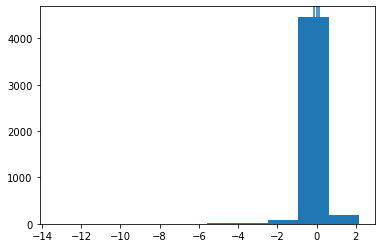

In [29]:
plt.hist(temp["z_scaled"])
for q in qs:
  plt.axvline(x=temp["{}_quant".format(q)].iloc[0])
plt.show()

0

In [18]:
zdf["quant"].value_counts()

0    11552421
3     3100612
1     2040084
2     1508717
Name: quant, dtype: int64